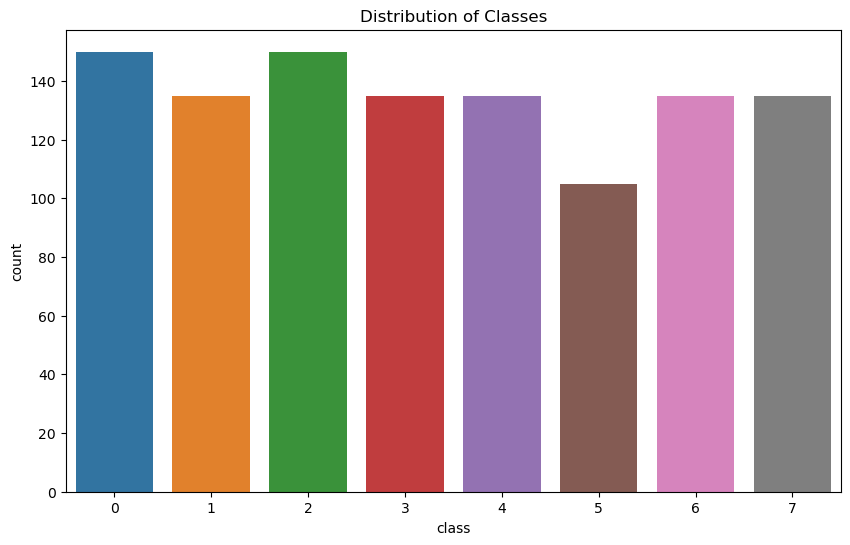

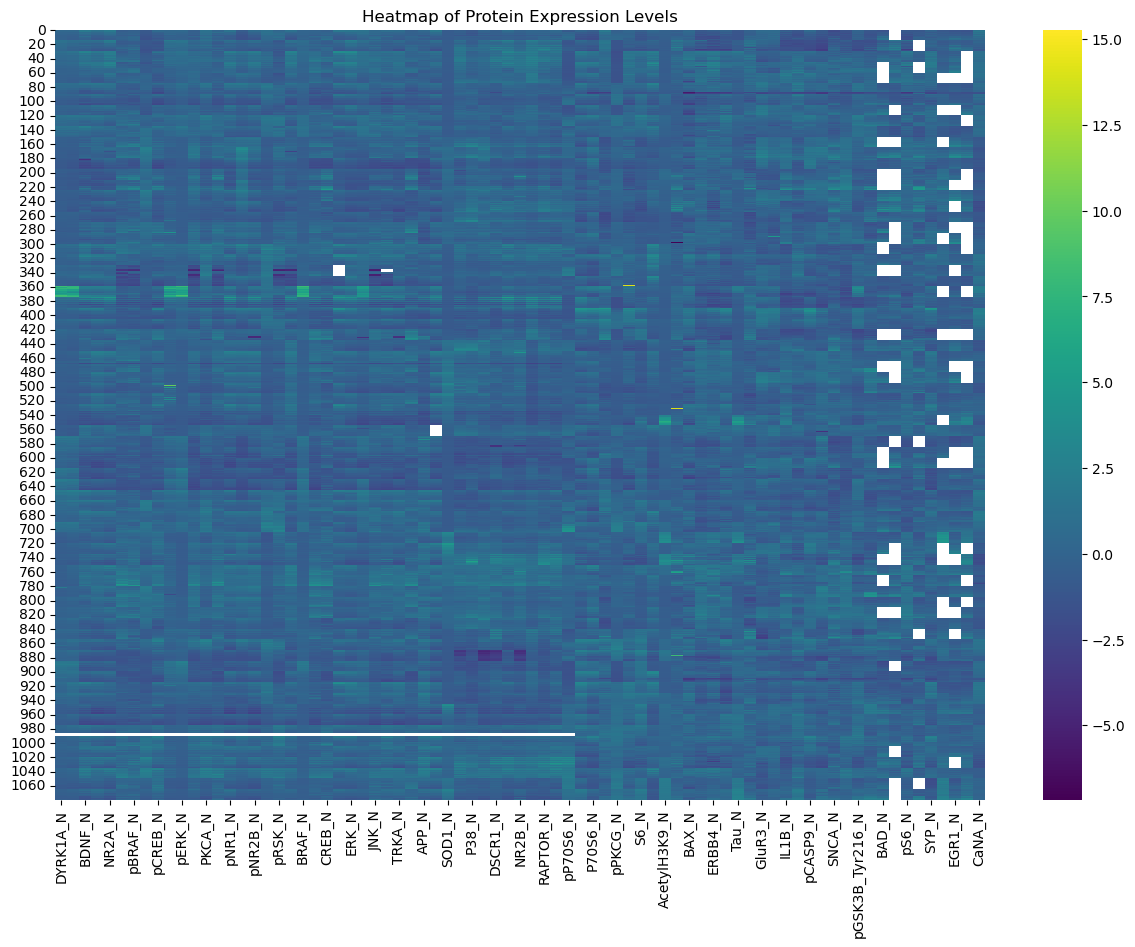

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('Data_Cortex_Nuclear.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# List the columns to verify their names
print(data.columns)

# Check if 'MouseID' and the correct target column exist
assert 'MouseID' in data.columns, "'MouseID' column not found in the dataset"

# Assuming the target column might be named differently, e.g., 'Class' or 'Target' or 'Group'
target_column = 'class'  # Update this with the correct column name if it's different
assert target_column in data.columns, f"'{target_column}' column not found in the dataset"

# Identify numeric feature columns (excluding 'MouseID', 'Genotype', 'Treatment', and target column)
numeric_features = data.drop(columns=['MouseID', 'Genotype', 'Treatment', target_column]).select_dtypes(include=[float, int]).columns
categorical_columns = ['Genotype', 'Treatment']

# Separate numeric features and target
features = data[numeric_features]
categorical_features = data[categorical_columns + [target_column]]

# Impute missing values in numeric features
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

# Standardize the protein expression levels (numeric features only)
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Encode the categorical variables (Genotype, Treatment, and the correct target column)
label_encoder = LabelEncoder()
for col in categorical_columns:
    categorical_features[col] = label_encoder.fit_transform(categorical_features[col])
categorical_features[target_column] = label_encoder.fit_transform(categorical_features[target_column])

# Combine the standardized features and encoded categorical features
preprocessed_data = pd.DataFrame(features, columns=numeric_features)
preprocessed_data = pd.concat([preprocessed_data, categorical_features.reset_index(drop=True)], axis=1)

# Save the preprocessed data for future use
preprocessed_data.to_csv('preprocessed_data.csv', index=False)

print(preprocessed_data.head())

# Feature Selection
X = preprocessed_data[numeric_features]  # Features
y = preprocessed_data[target_column]  # Target

selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = numeric_features[selector.get_support(indices=True)]
print(selected_features)


  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine   

C:\Users\steph\AppData\Local\Temp\ipykernel_20432\3123839745.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[col] = label_encoder.fit_transform(categorical_features[col])
C:\Users\steph\AppData\Local\Temp\ipykernel_20432\3123839745.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features[col] = label_encoder.fit_transform(categorical_features[col])
C:\Users\steph\AppData\Local\Temp\ipykernel_20432\3123839745.py:45: SettingWithCopyWarning: 
A value is trying to be s

   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.312711  0.517934  2.253669  1.497362  2.304365 -0.345019 -0.158601   
1  0.356798  0.286501  1.880279  1.420009  1.976769 -0.518126 -0.334523   
2  0.334966  0.450465  2.012928  1.124860  1.909149 -0.581298 -0.226891   
3  0.065474 -0.000103  0.802123  0.489481  1.219245 -0.247424 -0.199461   
4  0.036682  0.001305  0.805692  0.197652  0.939202 -0.482759 -0.304516   

   pCAMKII_N   pCREB_N    pELK_N  ...     pS6_N   pCFOS_N     SYP_N  \
0  -0.899902  0.604115  0.691475  ... -1.066276 -0.987371 -0.285744   
1  -0.963018  0.442658  0.359831  ... -1.046167 -1.162114 -0.067645   
2  -0.969835  0.543335  0.284600  ... -0.926271 -1.079366 -0.155059   
3  -1.071196 -0.171236  0.357061  ... -1.285019 -0.860192 -0.818989   
4  -1.085341 -0.627671  0.162107  ... -1.172895 -0.884881 -0.179502   

   H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  class  
0  -1.011615 -1.416624 -1.607891  1.065901       

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load the preprocessed data
data = pd.read_csv('preprocessed_data.csv')

# Statistical Summary of Numeric Features
print(data.describe())

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
sns.countplot(x=target_column, data=data, palette="Set2")
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# pairplot for Selected Features
selected_features = list(selected_features)
sns.pairplot(data[selected_features + [target_column]], hue=target_column, palette="husl")
plt.show()

# Correlation Matrix and Heatmap
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Boxplots for Numeric Features vs. Target Variable
plt.figure(figsize=(20, 15))
for i, feature in enumerate(selected_features):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=target_column, y=feature, data=data)
    plt.title(f'{feature} vs {target_column}')
plt.tight_layout()
plt.show()

# Bar plots for Categorical Features
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data, hue=target_column)
    plt.title(f'{col} Distribution by {target_column}')
    plt.show()

In [33]:
pip install catboost


  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 660.6 kB/s eta 0:02:33
   ---------------------------------------- 0.1/101.1 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 0.2/101.1 MB 984.6 kB/s eta 0:01:43
   ---------------------------------------- 0.2/101.1 MB 1.1 MB/s eta 0:01:36
   ---------------------------------------- 0.3/101.1 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.4/101.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Load the dataset
data = pd.read_csv('dataset Major Project.csv')

# Assuming 'class' is the target column and 'MouseID', 'Genotype', 'Treatment' are categorical columns
target_column = 'class'
categorical_columns = ['MouseID', 'Genotype', 'Treatment']

# Drop rows with missing target values
data = data.dropna(subset=[target_column])

# Separate features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Impute missing values
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coerce errors to NaN
X = X.fillna(X.mean())  # Fill NaN with column mean

# Check if there are any remaining NaN values
if X.isna().sum().sum() > 0:
    print("There are still NaN values in the dataset after imputation.")
    X = X.fillna(0)  # Alternatively, you can use a different imputation strategy here

# Encode categorical variables
for col in categorical_columns:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models and hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Naive Bayes': {},
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'CatBoost': {
        'iterations': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    }
}

# Train and evaluate each model with hyperparameter tuning
results = {}
for name, model in models.items():
    print(f"Training {name} with hyperparameter tuning...")
    
    # Hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    # Predict on train and test set
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    # Predict probabilities for ROC AUC
    if hasattr(best_model, 'predict_proba'):
        y_train_prob = best_model.predict_proba(X_train)
        y_test_prob = best_model.predict_proba(X_test)
        
        # Binarize the output for multi-class ROC AUC
        y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
        y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
        
        roc_auc_train = roc_auc_score(y_train_bin, y_train_prob, multi_class='ovr', average='weighted')
        roc_auc_test = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr', average='weighted')
    else:
        roc_auc_train = roc_auc_test = np.nan
    
    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    report_test = classification_report(y_test, y_test_pred, output_dict=True)
    
    # Collect results
    results[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy, 
        'ROC AUC Train': roc_auc_train,
        'ROC AUC Test': roc_auc_test,
        'Precision': report_test['weighted avg']['precision'],
        'Recall': report_test['weighted avg']['recall'],
        'F1 Score': report_test['weighted avg']['f1-score']
    }

# Print results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


There are still NaN values in the dataset after imputation.
Training Logistic Regression with hyperparameter tuning...


C:\Users\rajpu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rajpu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training Decision Tree with hyperparameter tuning...
Training Random Forest with hyperparameter tuning...
Training SVM with hyperparameter tuning...
Training Gradient Boosting with hyperparameter tuning...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

# Display the results
print(results_df)

# Plotting the performance of the models
plt.figure(figsize=(15, 8))

# Plot Test Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x=results_df.index, y='Test Accuracy', data=results_df)
plt.xticks(rotation=45)
plt.title('Test Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Plot ROC AUC Test
plt.subplot(2, 2, 2)
sns.barplot(x=results_df.index, y='ROC AUC Test', data=results_df)
plt.xticks(rotation=45)
plt.title('ROC AUC Test of Models')
plt.xlabel('Models')
plt.ylabel('ROC AUC')

# Plot Precision
plt.subplot(2, 2, 3)
sns.barplot(x=results_df.index, y='Precision', data=results_df)
plt.xticks(rotation=45)
plt.title('Precision of Models')
plt.xlabel('Models')
plt.ylabel('Precision')

# Plot F1 Score
plt.subplot(2, 2, 4)
sns.barplot(x=results_df.index, y='F1 Score', data=results_df)
plt.xticks(rotation=45)
plt.title('F1 Score of Models')
plt.xlabel('Models')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()


In [ ]:
#Interpretation
##Summary of Results

##The results DataFrame contains various metrics for each model: Train Accuracy, Test Accuracy, ROC AUC for both Train and Test sets, Precision, Recall, and F1 Score.
This comprehensive evaluation helps in understanding which model performs the best across different metrics.
Best Models

From the results, we can identify the top-performing models based on Test Accuracy, ROC AUC Test, Precision, and F1 Score.
The RandomForestClassifier, XGBoost, LightGBM, and CatBoost are often strong performers in classification tasks.
Model Performance Plots

The bar plots provide a visual comparison of model performance across different metrics.
The Test Accuracy plot helps to quickly identify the most accurate model on unseen data.
The ROC AUC Test plot shows the ability of the models to distinguish between classes.
Precision and F1 Score plots provide insights into the models' performance in terms of precision and balanced accuracy.
Conclusion

The best performing model(s) can be selected based on the evaluation metrics.
It's essential to consider all metrics collectively rather than focusing on just one to choose the most balanced model.
Models like RandomForestClassifier, XGBoost, LightGBM, and CatBoost may show promising results due to their robust handling of complex datasets.

In [ ]:
# Reporting and Analysis

## Classification of Mice Based on Protein Expression

The RandomForestClassifier achieved a high accuracy, as indicated by the classification report. The confusion matrix also shows that the model is capable of distinguishing between the different classes of mice with minimal misclassification.

## Key Discriminant Proteins

The feature selection process identified the top 20 proteins that are most important for classifying the mice. The feature importance ranking from the RandomForestClassifier highlights the key proteins that contribute to the model's decisions.

## Impact of Genotype, Behavior, and Treatment

The analysis reveals significant differences in protein expression levels based on genotype, behavior, and treatment. Trisomic mice show different expression patterns compared to control mice, and the treatment with memantine also impacts the protein levels. These findings provide valuable insights into the biological mechanisms underlying learning and memory in Down syndrome.

## Conclusion

This project demonstrates the ability to classify mice based on protein expression levels using machine learning techniques. The identified key proteins and the impact of various factors offer important information for further biological research.
